# PET simulation analysis

Analysis after the simulation :
- in folder: pet/
- macro: main.mac


In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import numpy as np
from ipywidgets import interact
import os
from pathlib import Path
import uproot

In [186]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path('../output')
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))
filename = os.path.join(folder, 'pet.root')
f = uproot.open(filename)

The Current Working Directory (CWD) is: 
 /home/dsarrut/src/gate/gate/geant-val/pet/py


In [182]:
print("List of keys: \n", f.keys())
print(f[b'latest_event_ID'])
print('nb primary ', f[b'total_nb_primaries'])

singles = f[b'Singles']
print('nb singles ', len(f[b'Singles']), singles.arrays()[b'sourcePosX'])

List of keys: 
 [b'Singles;9445', b'Singles;9444', b'Coincidences;710', b'Coincidences;709', b'delay;25', b'delay;24', b'latest_event_ID;1', b'total_nb_primaries;1', b'Hits;1', b'OpticalData;1']
<b'TH1D' b'latest_event_ID' 0x7f9ebec50a98>
nb primary  <b'TH1D' b'total_nb_primaries' 0x7f9ebec50a98>
nb singles  9444781 [ 0.2794987   0.2794987   0.47884983 ... -0.33462194 -0.09813997
  0.14803672]


In [187]:
coinc = f[b'Coincidences']
print('Number of coincidences', len(coinc))
print('Keys: ', coinc.keys())

Number of coincidences 709032
Keys:  [b'runID', b'axialPos', b'rotationAngle', b'eventID1', b'sourceID1', b'sourcePosX1', b'sourcePosY1', b'sourcePosZ1', b'time1', b'energy1', b'globalPosX1', b'globalPosY1', b'globalPosZ1', b'gantryID1', b'rsectorID1', b'moduleID1', b'submoduleID1', b'crystalID1', b'layerID1', b'comptonPhantom1', b'comptonCrystal1', b'RayleighPhantom1', b'RayleighCrystal1', b'eventID2', b'sourceID2', b'sourcePosX2', b'sourcePosY2', b'sourcePosZ2', b'time2', b'energy2', b'globalPosX2', b'globalPosY2', b'globalPosZ2', b'gantryID2', b'rsectorID2', b'moduleID2', b'submoduleID2', b'crystalID2', b'layerID2', b'comptonPhantom2', b'comptonCrystal2', b'RayleighPhantom2', b'RayleighCrystal2', b'sinogramTheta', b'sinogramS', b'comptVolName1', b'comptVolName2', b'RayleighVolName1', b'RayleighVolName2']


1418064



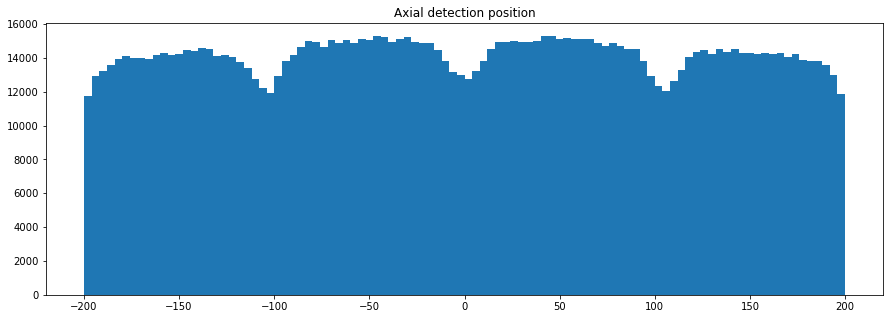

In [188]:
# Axial Detection
ad1 = coinc.arrays()[b'globalPosZ1']
ad2 = coinc.arrays()[b'globalPosZ2']
ad = np.concatenate((ad1, ad2))
print(len(ad))
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.hist(ad, bins=100)
ax.set_title('Axial detection position')
print('') # need to remove verbose output

709032 323639 385393



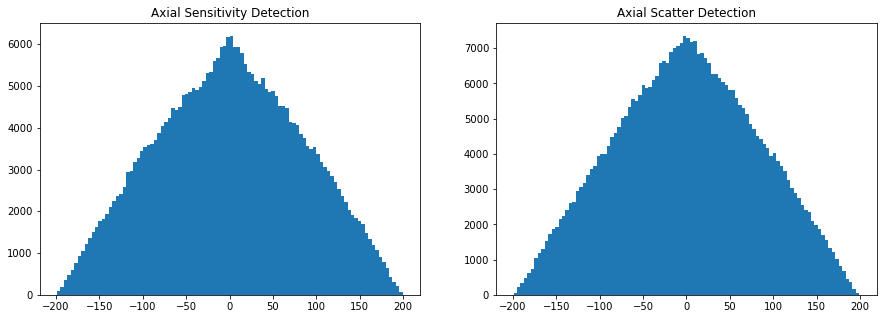

In [189]:
# tuc true unscattered coincidences
# tsc true scattered coincindences
z = (ad1+ad2)/2
compt1 = coinc.arrays()[b'comptonPhantom1']
compt2 = coinc.arrays()[b'comptonPhantom2']
rayl1 = coinc.arrays()[b'RayleighPhantom1']
rayl2 = coinc.arrays()[b'RayleighPhantom2']
mask =  ((compt1==0) & (compt2==0) & (rayl1==0) & (rayl2==0))
tuc = z[mask]
tsc = z[~mask]
print(len(z), len(tuc), len(tsc))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(tuc, bins=100)
ax[0].set_title('Axial Sensitivity Detection')
ax[1].hist(tsc, bins=100)
ax[1].set_title('Axial Scatter Detection')
print('') # need to remove verbose output

Text(0.5, 1.0, 'Randoms')

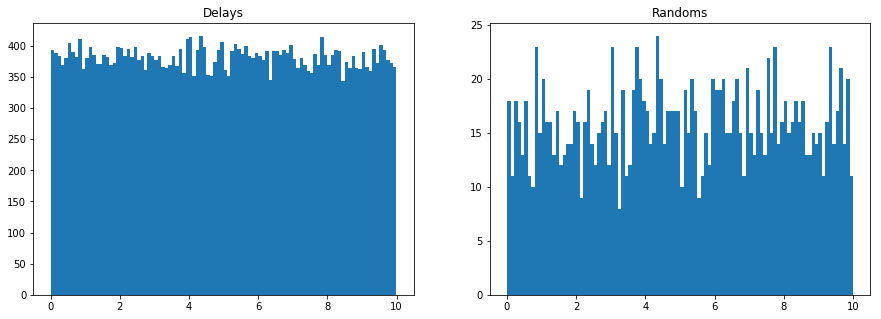

In [176]:
# Delays and Randoms
delays = coinc.arrays()[b'time1']

eventID1 = coinc.arrays()[b'eventID1']
eventID2 = coinc.arrays()[b'eventID2']
randoms = delays[eventID1 != eventID2]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(delays, bins=100)
ax[0].set_title('Delays')
ax[1].hist(randoms, bins=100)
ax[1].set_title('Randoms')


# OLD

In [123]:
hits = f[b'Hits']
print('Number of hits:', len(hits))
print('Hits: ')
for i in hits.keys():
    print(i, ' ', end='')

Number of hits: 0
Hits: 
b'PDGEncoding'  b'trackID'  b'parentID'  b'trackLocalTime'  b'time'  b'edep'  b'stepLength'  b'trackLength'  b'posX'  b'posY'  b'posZ'  b'localPosX'  b'localPosY'  b'localPosZ'  b'momDirX'  b'momDirY'  b'momDirZ'  b'gantryID'  b'rsectorID'  b'moduleID'  b'submoduleID'  b'crystalID'  b'layerID'  b'photonID'  b'nPhantomCompton'  b'nCrystalCompton'  b'nPhantomRayleigh'  b'nCrystalRayleigh'  b'primaryID'  b'sourcePosX'  b'sourcePosY'  b'sourcePosZ'  b'sourceID'  b'eventID'  b'runID'  b'axialPos'  b'rotationAngle'  b'volumeID'  b'processName'  b'comptVolName'  b'RayleighVolName'  

# Plot 1: position of hits, hits times (global & local)

Text(0.5, 0, 'Time in ns')

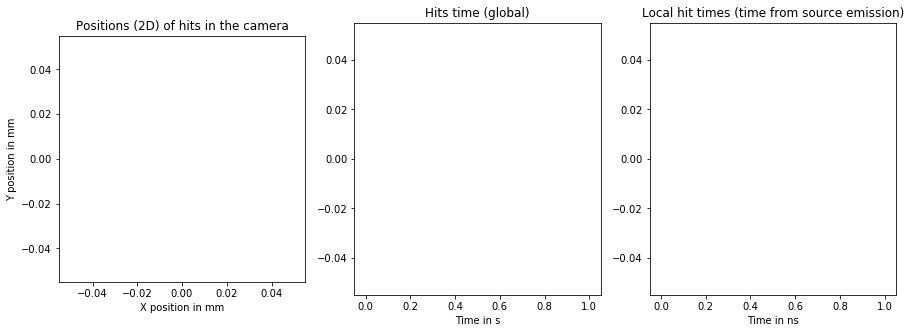

In [124]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
hits_x = hits.arrays()[b'posX']
hits_y = hits.arrays()[b'posY']
ax[0].scatter(hits_x, hits_y, alpha=0.8, s=3)
ax[0].set_title('Positions (2D) of hits in the camera')
ax[0].set_xlabel('X position in mm')
ax[0].set_ylabel('Y position in mm')
ax[0].set_aspect('equal')

# Plot 2
times = hits.arrays()[b'time']
n, bins, patches = ax[1].hist(times, 100, facecolor='green', alpha=0.75)
ax[1].set_title('Hits time (global)')
ax[1].set_xlabel('Time in s')

# Plot 3
times = hits.arrays()[b'trackLocalTime']*1e9
n, bins, patches = ax[2].hist(times, 100, facecolor='green', alpha=0.75)
ax[2].set_title('Local hit times (time from source emission)')
ax[2].set_xlabel('Time in ns')

# Plot 2: edep, step length and track length

Text(0.5,0,'Length in mm')

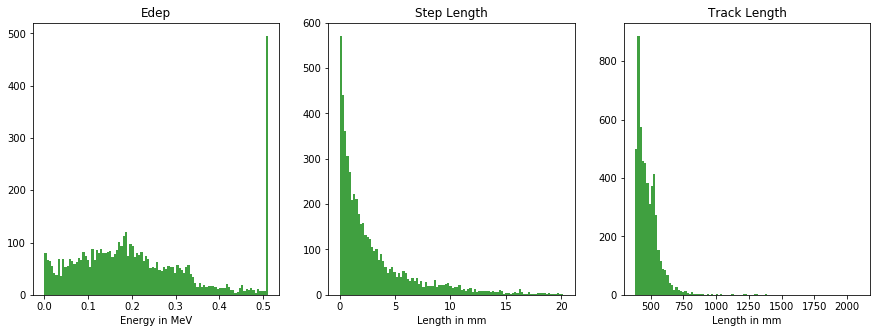

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
edep = hits.arrays()[b'edep']
n, bins, patches = ax[0].hist(edep, 100, facecolor='green', alpha=0.75)
ax[0].set_title('Edep')
ax[0].set_xlabel('Energy in MeV')

# Plot 1
stepLength = hits.arrays()[b'stepLength']
n, bins, patches = ax[1].hist(stepLength, 100, facecolor='green', alpha=0.75)
ax[1].set_title('Step Length')
ax[1].set_xlabel('Length in mm')

# Plot 2
trackLength = hits.arrays()[b'trackLength']
n, bins, patches = ax[2].hist(trackLength, 100, facecolor='green', alpha=0.75)
ax[2].set_title('Track Length')
ax[2].set_xlabel('Length in mm')

In [38]:
singles = f[b'Singles']
print('Number of Singles :', len(singles))
print('Singles: ')
for i in singles.keys():
    print(i, ' ', end='')

Number of Singles : 1257
Singles: 
b'runID'  b'eventID'  b'sourceID'  b'sourcePosX'  b'sourcePosY'  b'sourcePosZ'  b'time'  b'energy'  b'globalPosX'  b'globalPosY'  b'globalPosZ'  b'gantryID'  b'blockID'  b'crystalID'  b'unused3ID'  b'unused4ID'  b'unused5ID'  b'comptonPhantom'  b'comptonCrystal'  b'RayleighPhantom'  b'RayleighCrystal'  b'axialPos'  b'rotationAngle'  b'comptVolName'  b'RayleighVolName'  

# Plot 3: energy  of the singles

Text(0.5,0,'Energy in keV')

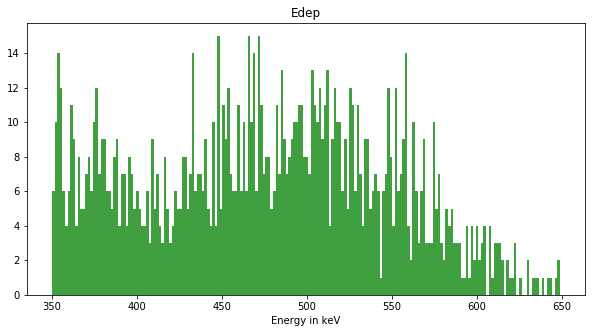

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot 1
energy = singles.arrays()[b'energy']/0.001
n, bins, patches = ax.hist(energy, 200, facecolor='green', alpha=0.75)
ax.set_title('Edep')
ax.set_xlabel('Energy in keV')

# Plot 4: Coincidencs and LOR

In [40]:
coinc = f[b'Coincidences']
print('Number of coincidences :', len(coinc))
print('coinc: ')
for i in coinc.keys():
    print(i, ' ', end='')

Number of coincidences : 65
coinc: 
b'runID'  b'axialPos'  b'rotationAngle'  b'eventID1'  b'sourceID1'  b'sourcePosX1'  b'sourcePosY1'  b'sourcePosZ1'  b'time1'  b'energy1'  b'globalPosX1'  b'globalPosY1'  b'globalPosZ1'  b'gantryID1'  b'blockID1'  b'crystalID1'  b'unused3ID1'  b'unused4ID1'  b'unused5ID1'  b'comptonPhantom1'  b'comptonCrystal1'  b'RayleighPhantom1'  b'RayleighCrystal1'  b'eventID2'  b'sourceID2'  b'sourcePosX2'  b'sourcePosY2'  b'sourcePosZ2'  b'time2'  b'energy2'  b'globalPosX2'  b'globalPosY2'  b'globalPosZ2'  b'gantryID2'  b'blockID2'  b'crystalID2'  b'unused3ID2'  b'unused4ID2'  b'unused5ID2'  b'comptonPhantom2'  b'comptonCrystal2'  b'RayleighPhantom2'  b'RayleighCrystal2'  b'sinogramTheta'  b'sinogramS'  b'comptVolName1'  b'comptVolName2'  b'RayleighVolName1'  b'RayleighVolName2'  

Text(0.5,1,'Lines of response (LOR)')

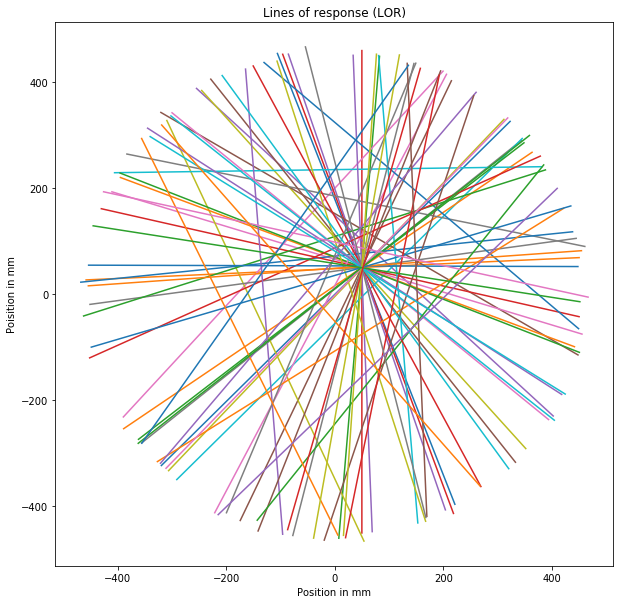

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x1 = coinc.arrays()[b'globalPosX1']
y1 = coinc.arrays()[b'globalPosY1']
x2 = coinc.arrays()[b'globalPosX2']
y2 = coinc.arrays()[b'globalPosY2']

ax.plot([x1,x2],[y1,y2])

ax.autoscale()
ax.set_xlabel('Position in mm')
ax.set_ylabel('Poisition in mm')
ax.set_title('Lines of response (LOR)')